# **Scenario 1:  Impact of PR on Execution Time at Different VM Levels (Baseline PR vs. High PR)**

***Objective:*** how the PR affects execution time across different virtual machine (VM) levels, comparing baseline experiments (PR = 0) to high PR levels (PR = 0.75).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file_path = '/content/resultAnalysisTable.csv'
data = pd.read_csv(file_path)
data.head(10)

,VM,Task,pr,Selection_Type,ALO-Execution time(s),HBA-Execution time(s),HGA-Execution time(s)
0,30,100,0.00,Baseline Experiment,83.023756,9.143721,5.809526
1,30,100,0.10,Low pr,78.704777,8.461468,5.929399
2,30,100,0.25,Moderate pt,78.604779,7.762805,5.907713
3,30,100,0.50,Balanced pr,78.938119,6.397730,6.047989
4,30,100,0.75,High pr,78.917419,6.453555,5.846420
5,30,100,0.90,Extreme pr,78.391894,5.231884,5.781384
6,30,100,1.00,max pr,78.595554,6.468706,5.757311
7,45,100,0.00,Baseline Experiment,78.787852,5.194778,6.024199
8,45,100,0.10,Low pr,78.727330,5.796005,5.794411
9,45,100,0.25,Moderate pt,78.579733,5.938601,5.926735


In [3]:
# Filter data for Baseline and High PR (PR = 0.75)
baseline_data = data[data['Selection_Type'] == 'Baseline Experiment']
high_pr_data = data[data['pr'] == 0.75]

In [4]:
baseline_data

,VM,Task,pr,Selection_Type,ALO-Execution time(s),HBA-Execution time(s),HGA-Execution time(s)
0,30,100,0.0,Baseline Experiment,83.023756,9.143721,5.809526
7,45,100,0.0,Baseline Experiment,78.787852,5.194778,6.024199
14,60,100,0.0,Baseline Experiment,78.875399,5.306494,5.800791
21,75,100,0.0,Baseline Experiment,78.941974,5.356925,5.750722
28,90,100,0.0,Baseline Experiment,79.240864,5.419711,5.790021
35,30,375,0.0,Baseline Experiment,296.959549,15.340153,15.390023
42,45,375,0.0,Baseline Experiment,287.752008,15.651728,15.850577
49,60,375,0.0,Baseline Experiment,288.953518,16.437090,14.727373
56,75,375,0.0,Baseline Experiment,290.143403,16.074111,14.720178
63,90,375,0.0,Baseline Experiment,289.449871,15.886986,14.878705


In [5]:
high_pr_data

,VM,Task,pr,Selection_Type,ALO-Execution time(s),HBA-Execution time(s),HGA-Execution time(s)
4,30,100,0.75,High pr,78.917419,6.453555,5.846420
11,45,100,0.75,High pr,79.121162,6.645844,5.867824
18,60,100,0.75,High pr,78.624913,6.589888,5.705826
25,75,100,0.75,High pr,77.938300,6.341626,5.740007
32,90,100,0.75,High pr,79.858756,5.604712,5.862902
39,30,375,0.75,High pr,291.309250,16.161281,15.415750
46,45,375,0.75,High pr,288.014293,15.355126,15.064855
53,60,375,0.75,High pr,288.416158,15.473274,14.846293
60,75,375,0.75,High pr,288.044676,16.300781,14.709277
67,90,375,0.75,High pr,296.881461,16.324303,14.937330


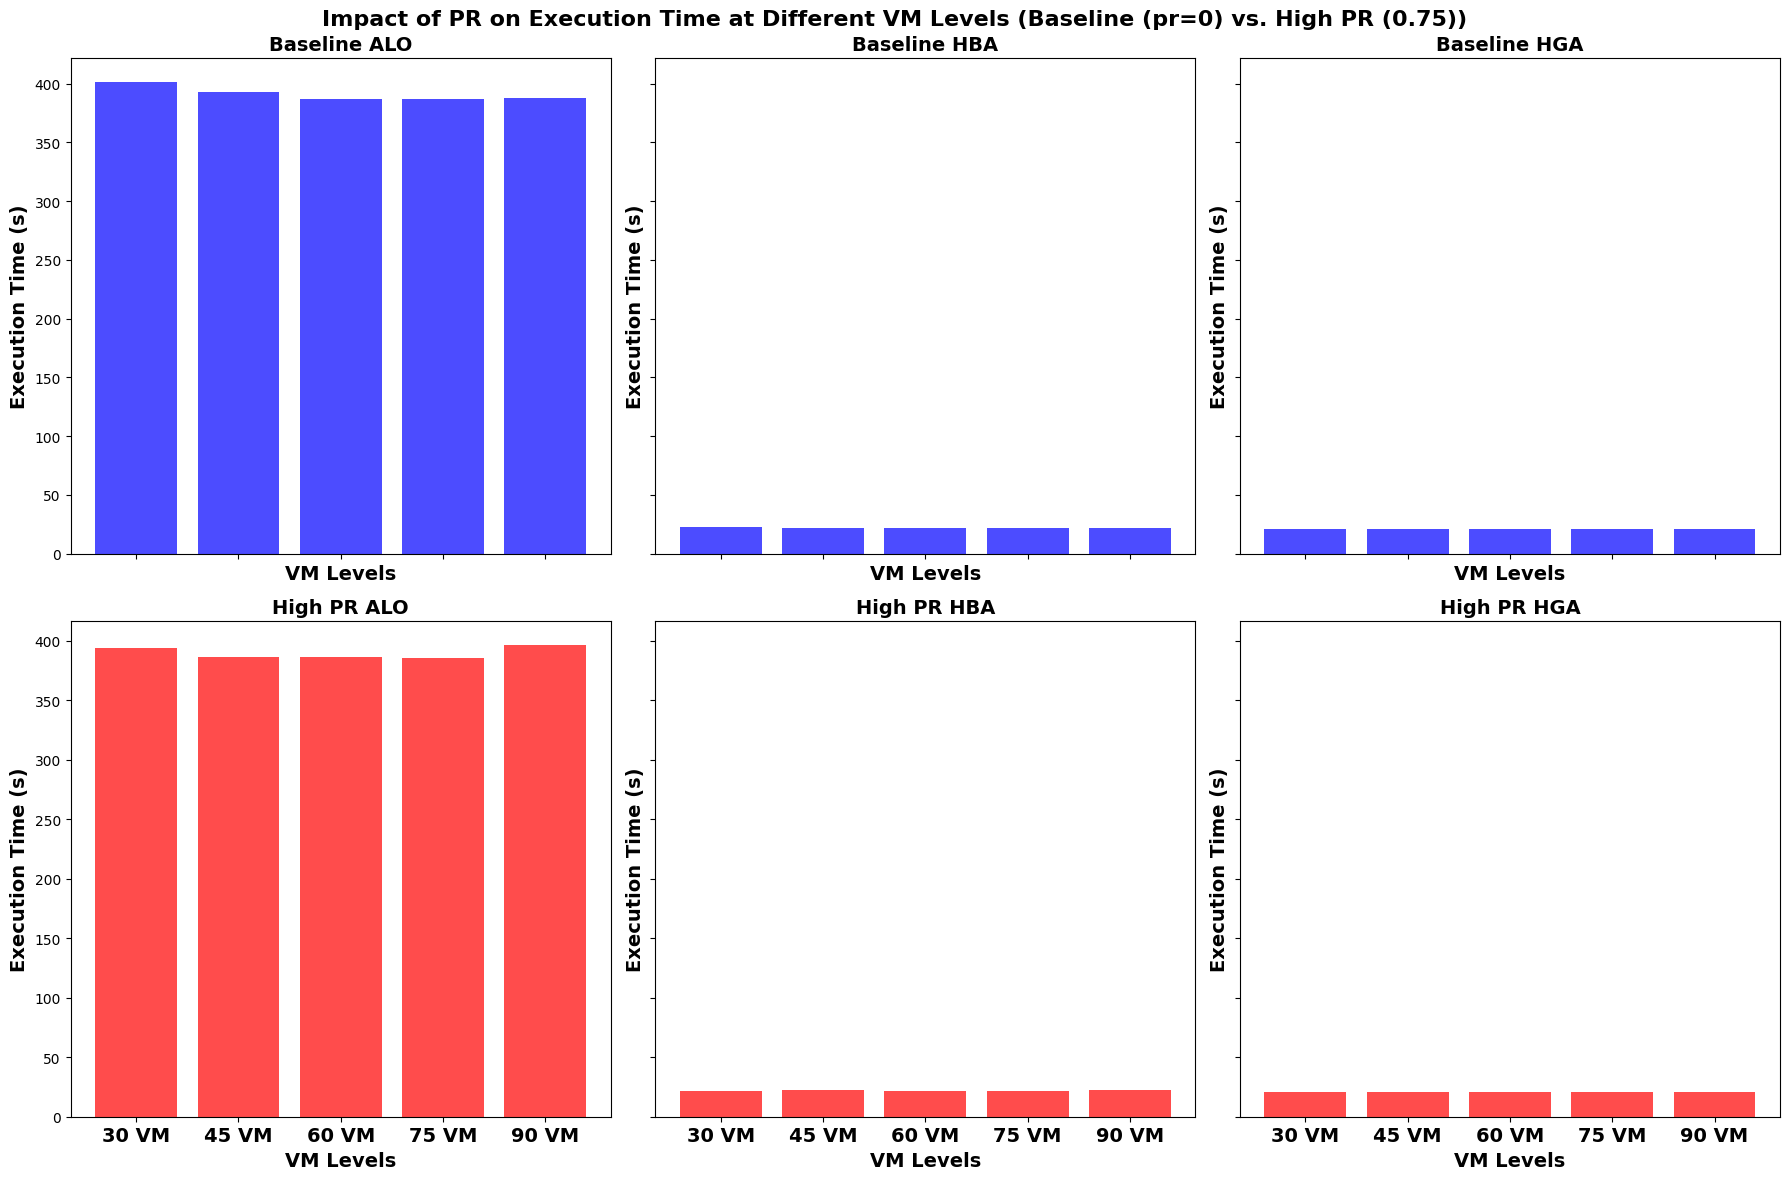

In [6]:
# Set VM levels
vm_levels = sorted(baseline_data['VM'].unique())

# Prepare for plotting
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12), sharex='col', sharey='row')
fig.suptitle('Impact of PR on Execution Time at Different VM Levels (Baseline (pr=0) vs. High PR (0.75))', fontsize=16, fontweight='bold')
# Define the algorithms
algorithms = ['ALO-Execution time(s)', 'HBA-Execution time(s)', 'HGA-Execution time(s)']
titles = ['ALO', 'HBA', 'HGA']
bar_width = 12
# Plotting Baseline Experiment data
for i, algorithm in enumerate(algorithms):
    ax = axes[0, i]
    values = [baseline_data[baseline_data['VM'] == vm][algorithm].mean() for vm in vm_levels]
    ax.bar(vm_levels, values, color='b', alpha=0.7, width=bar_width)
    ax.set_title(f'Baseline {titles[i]}', fontsize=14, fontweight='bold')
    ax.set_xlabel('VM Levels', fontsize=14, fontweight='bold')
    ax.set_ylabel('Execution Time (s)', fontsize=14, fontweight='bold')
    ax.set_xticks(vm_levels)
    ax.set_xticklabels([f'{vm} VM' for vm in vm_levels])

# Plotting High PR data
for i, algorithm in enumerate(algorithms):
    ax = axes[1, i]
    values = [high_pr_data[high_pr_data['VM'] == vm][algorithm].mean() for vm in vm_levels]
    ax.bar(vm_levels, values, color='r', alpha=0.7, width=bar_width)
    ax.set_title(f'High PR {titles[i]}', fontsize=14, fontweight='bold')
    ax.set_xlabel('VM Levels', fontsize=14, fontweight='bold')
    ax.set_ylabel('Execution Time (s)', fontsize=14, fontweight='bold')
    ax.set_xticks(vm_levels)
    ax.set_xticklabels([f'{vm} VM' for vm in vm_levels], fontsize=14, fontweight='bold')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

**Calculating the difference to compare execution time differences between Baseline pr and High pr Scenarios.**

In [7]:
vm_levels = sorted(data['VM'].unique())
algorithms = ['ALO-Execution time(s)', 'HBA-Execution time(s)', 'HGA-Execution time(s)']

differences = {alg: [] for alg in algorithms}

for vm in vm_levels:
    baseline_vm = baseline_data[baseline_data['VM'] == vm]
    high_pr_vm = high_pr_data[high_pr_data['VM'] == vm]

    for algorithm in algorithms:
        baseline_mean = baseline_vm[algorithm].mean()
        high_pr_mean = high_pr_vm[algorithm].mean()
        difference = baseline_mean - high_pr_mean
        differences[algorithm].append(difference)

differences_df = pd.DataFrame(differences, index=vm_levels)
print(differences_df)

    ALO-Execution time(s)  HBA-Execution time(s)  HGA-Execution time(s)
30               7.728979               0.334444               0.066383
45               6.643584              -0.627933               0.187698
60               0.626282              -0.126417              -0.030524
75               0.986675              -0.312636               0.080185
90              -8.762890              -0.691864              -0.011220


1. * VM Level 30: +7.73 seconds,
   * VM Level 45: +6.64 seconds,
   * VM Level 60: +0.63 seconds,
   * VM Level 75: +0.99 seconds,
   * VM Level 90: -8.76 seconds
* ALO: For lower VM levels (30 and 45), high PR results in increased execution time, but at higher VM levels (60, 75, and 90), the difference is smaller or even negative, suggesting that the impact of high PR varies with the number of VMs.

2. * VM Level 30: +0.33 seconds,
   * VM Level 45: -0.63 seconds,
   * VM Level 60: -0.13 seconds,
   * VM Level 75: -0.31 seconds,
   * VM Level 90: -0.69 seconds
* For HBA, high PR generally results in decreased execution time, particularly noticeable at higher VM levels (45, 75, and 90). This suggests high PR tends to improve performance for HBA.

3. * VM Level 30: +0.07 seconds,
   * VM Level 45: +0.19  seconds,
   * VM Level 60: -0.03  seconds,
   * VM Level 75: +0.08 seconds,
   * VM Level 90: -0.01 seconds
* The differences for HGA are generally small, with some VM levels showing a slight increase and others showing a decrease. Overall, the impact of high PR on HGA execution time is minimal.

**Highlighting Trends or Significant Differences between Baseline Experiment and  High PR**

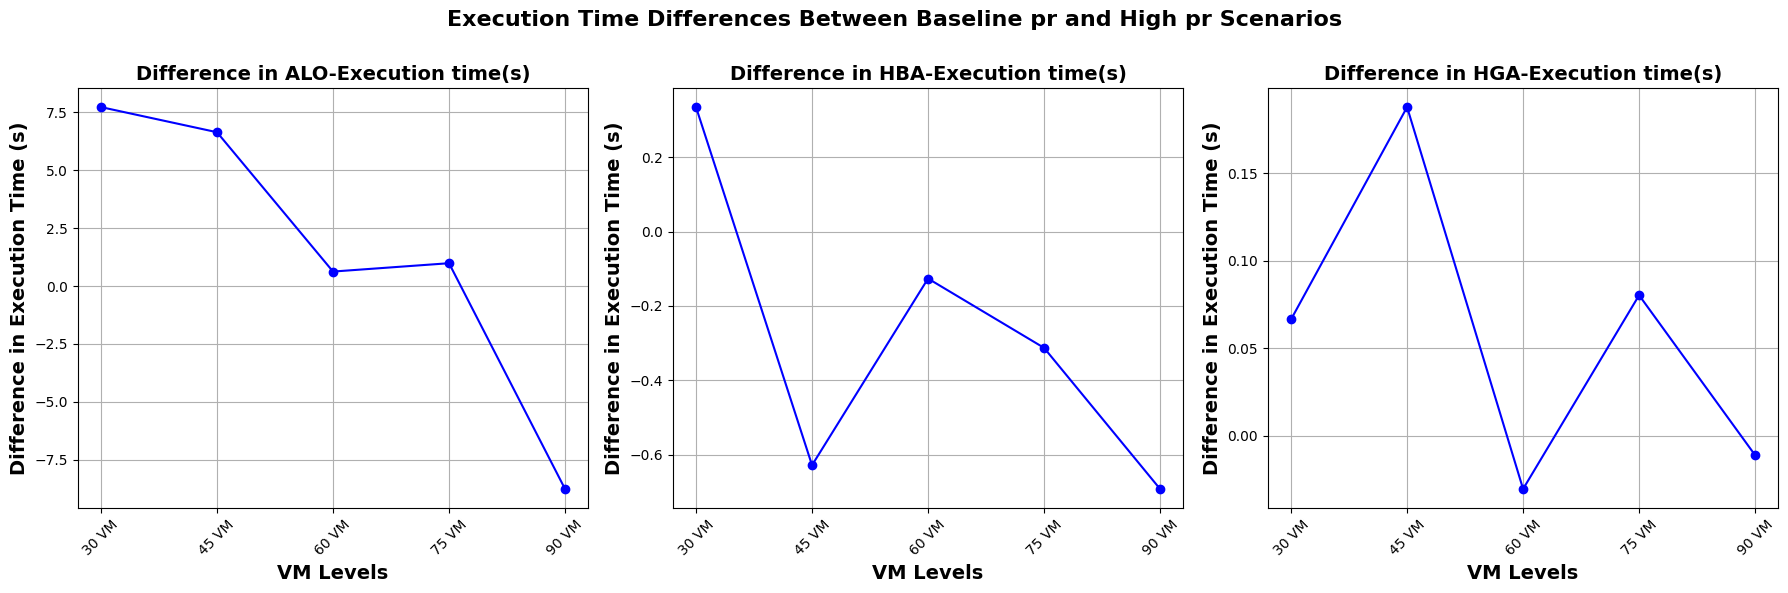

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6), sharex=True)
fig.suptitle('Execution Time Differences Between Baseline pr and High pr Scenarios', fontsize=16, fontweight='bold')

for i, algorithm in enumerate(algorithms):
    ax = axes[i]
    ax.plot(vm_levels, differences[algorithm], marker='o', linestyle='-', color='b')
    ax.set_title(f'Difference in {algorithm}', fontsize=14, fontweight='bold')
    ax.set_xlabel('VM Levels', fontsize=14, fontweight='bold')
    ax.set_ylabel('Difference in Execution Time (s)', fontsize=14, fontweight='bold')
    ax.set_xticks(vm_levels)
    ax.set_xticklabels([f'{vm} VM' for vm in vm_levels], rotation=45)
    ax.grid(True)

plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Adjust the top to make room for the suptitle
plt.show()

1. ALO: The impact of high PR on execution time varies with VM levels. It increases execution time at lower VM levels but decreases it at higher VM levels.
2. HBA: High PR consistently leads to decreased execution time, particularly at higher VM levels.
3. HGA: The impact of high PR on execution time is minimal, with some increases and decreases but no significant trend.

# **Scenario 2: Comparison of Execution Times Across Algorithms at Maximum PR**

***Objective***: Examine how the algorithms (ALO, HBA, HGA) perform under the maximum PR condition (PR = 1) for varying workloads.

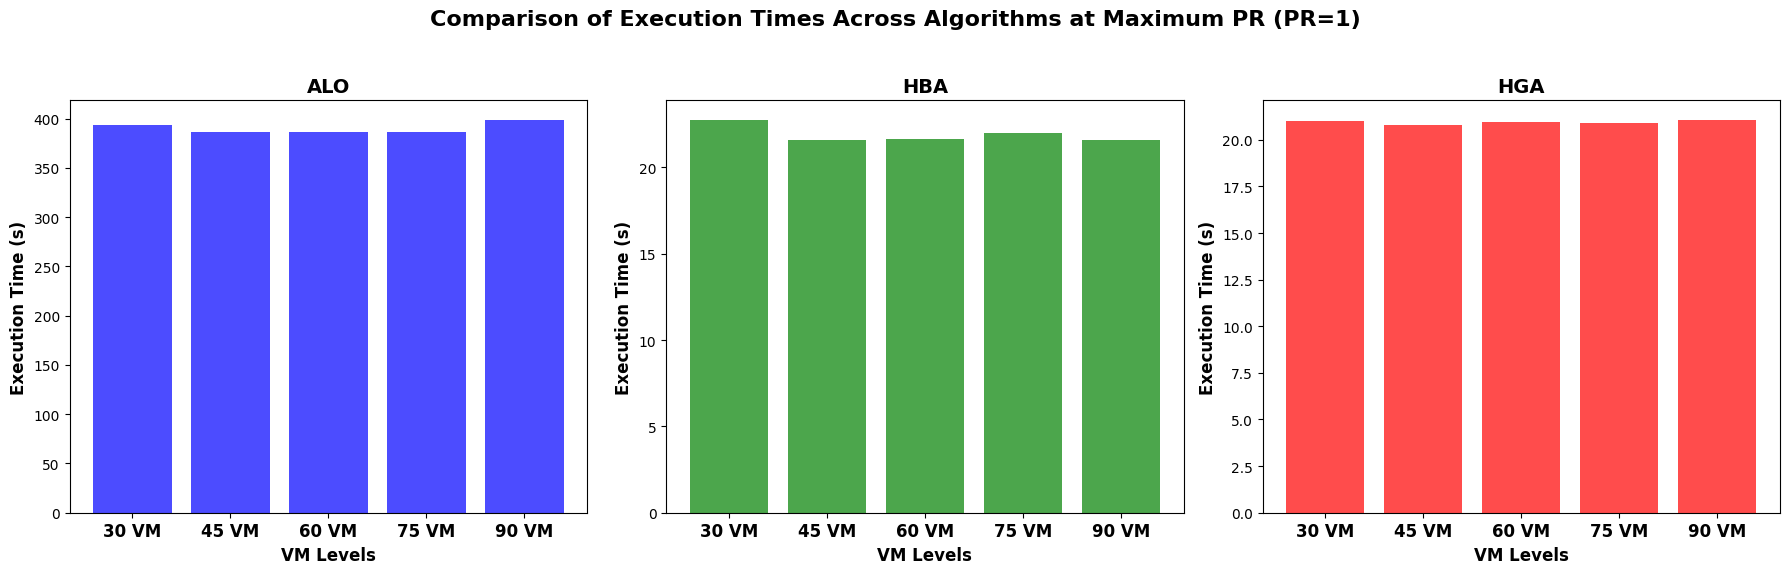

In [9]:
max_pr_data = data[data['pr'] == 1]

# Extract unique VM levels
vm_levels = sorted(max_pr_data['VM'].unique())

# Define the algorithms and their titles
algorithms = ['ALO-Execution time(s)', 'HBA-Execution time(s)', 'HGA-Execution time(s)']
titles = ['ALO', 'HBA', 'HGA']
colors = ['b', 'g', 'r']  # Colors for each algorithm

# Prepare the plotting
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6), sharex='all')
fig.suptitle('Comparison of Execution Times Across Algorithms at Maximum PR (PR=1)', fontsize=16, fontweight='bold')

for i, algorithm in enumerate(algorithms):
    ax = axes[i]
    values = [max_pr_data[max_pr_data['VM'] == vm][algorithm].mean() for vm in vm_levels]
    ax.bar(vm_levels, values, color=colors[i], alpha=0.7, width=bar_width)
    ax.set_title(titles[i], fontsize=14, fontweight='bold')
    ax.set_xlabel('VM Levels', fontsize=12, fontweight='bold')
    ax.set_ylabel('Execution Time (s)', fontsize=12, fontweight='bold')
    ax.set_xticks(vm_levels)
    ax.set_xticklabels([f'{vm} VM' for vm in vm_levels], fontsize=12, fontweight='bold')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust to make space for the suptitle

# Show the plots
plt.show()

**Analysis Result:**
1. Identifying the Most Efficient Algorithm at Maximum PR (pr=1)
 * At PR=1, HGA generally has the shortest execution time, making it the most efficient algorithm for this parameter setting. ALO and HBA show slightly higher execution times as the number of VMs increases, but HGA maintains the lowest execution time across all VM counts.
2. Scalability of Algorithms Under Maximum PR Conditions:
 * Execution times increase significantly with the number of tasks, indicating that ALO does not scale as efficiently with larger task sizes.
 * Execution times increase with task sizes but remain significantly higher compared to HGA. HBA also shows relatively slower scalability compared to HGA.
 * execution times increase with task size, HGA consistently has the lowest execution times across all task sizes, demonstrating better scalability compared to ALO and HBA.

# **Scenario 3: Effect of PR on Execution Time for Low and Moderate Workloads**

***Objective:*** Explore how low and moderate PR values affect the execution time across different VM levels for a moderate task size (e.g., 375 tasks).

In [10]:
filtered_data = data[(data['pr'].isin([0.1, 0.25])) & (data['Task'] == 375)]

In [11]:
data_0_1 = filtered_data[filtered_data['pr'] == 0.1]
data_0_25 = filtered_data[filtered_data['pr'] == 0.25]

In [12]:
vm_levels = sorted(filtered_data['VM'].unique())

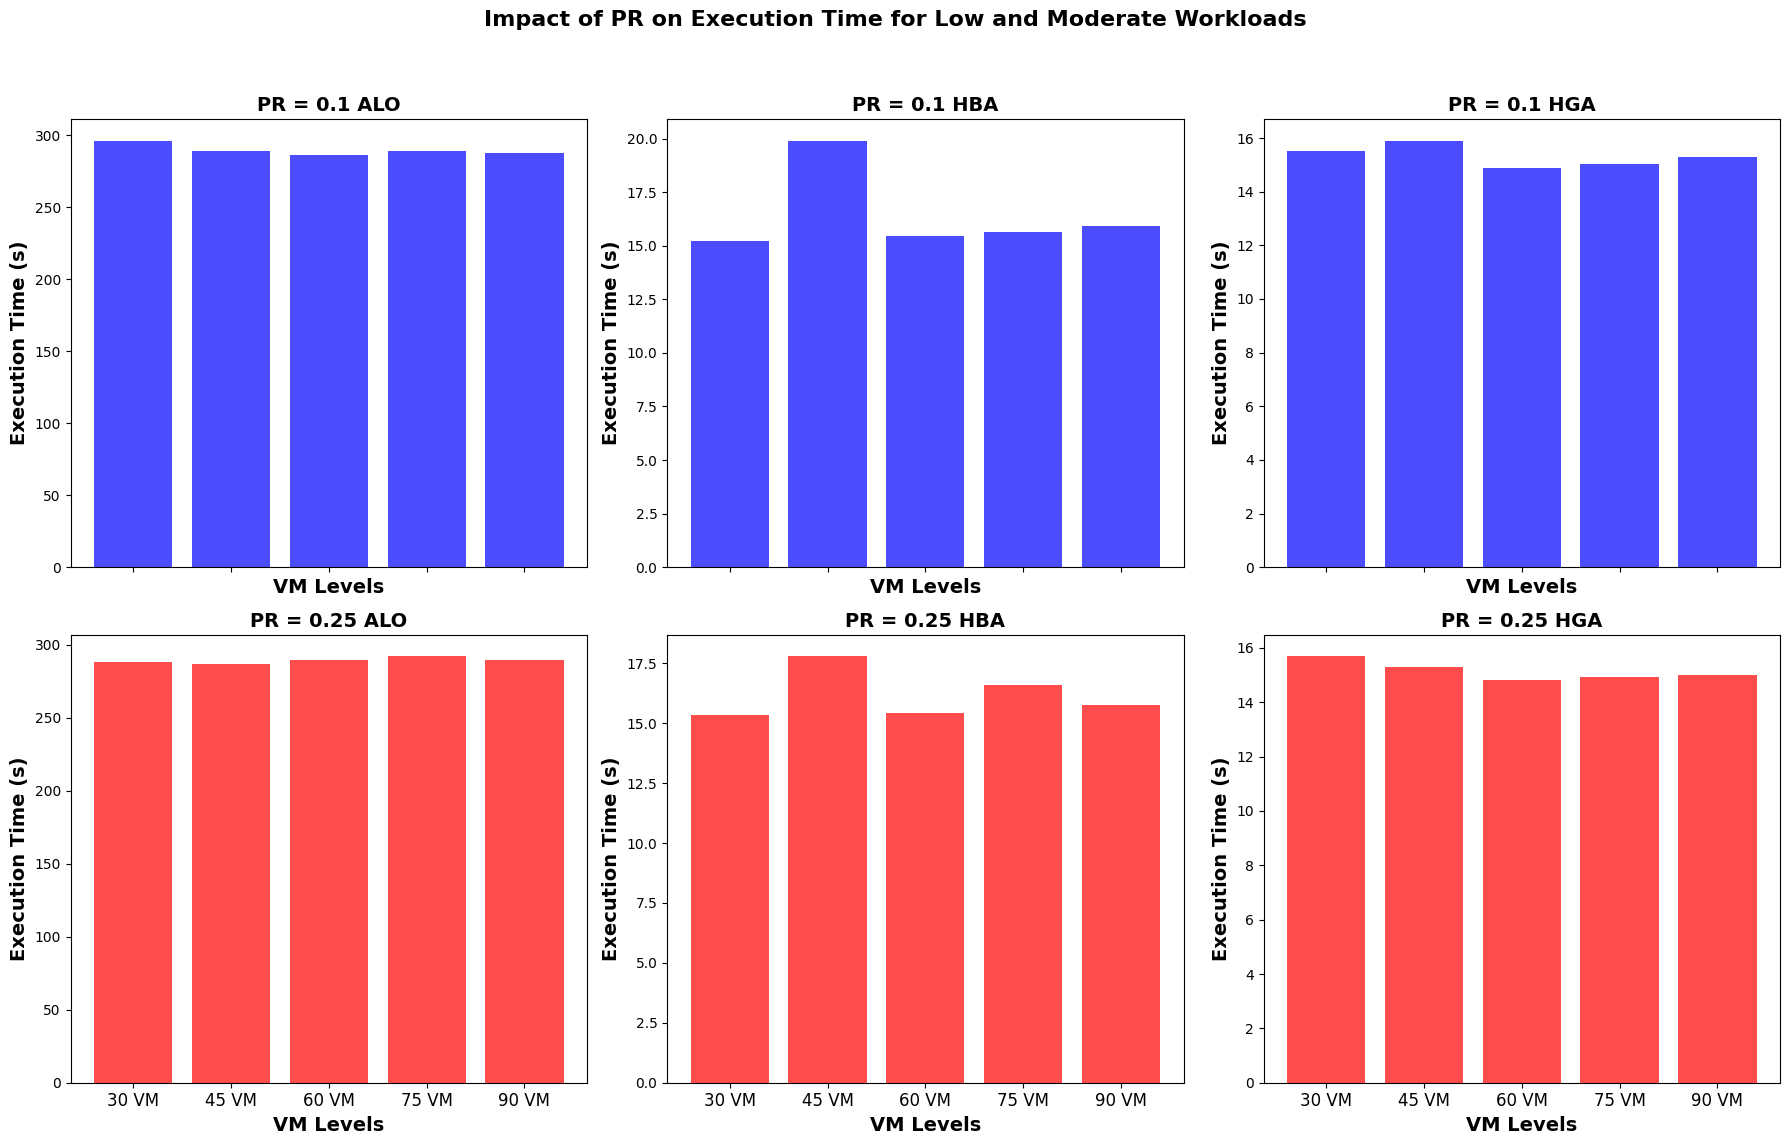

In [13]:
# Define algorithms and their titles
algorithms = ['ALO-Execution time(s)', 'HBA-Execution time(s)', 'HGA-Execution time(s)']
titles = ['ALO', 'HBA', 'HGA']
colors = ['b', 'r']  # Colors for PR 0.1 and PR 0.25

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12), sharex='col', sharey=False)
fig.suptitle('Impact of PR on Execution Time for Low and Moderate Workloads', fontsize=16, fontweight='bold')

# Plot for PR = 0.1
for i, algorithm in enumerate(algorithms):
    ax = axes[0, i]
    values = [data_0_1[data_0_1['VM'] == vm][algorithm].mean() for vm in vm_levels]
    ax.bar(vm_levels, values, color=colors[0], alpha=0.7, width=12)
    ax.set_title(f'PR = 0.1 {titles[i]}', fontsize=14, fontweight='bold')
    ax.set_xlabel('VM Levels', fontsize=14, fontweight='bold')
    ax.set_ylabel('Execution Time (s)', fontsize=14, fontweight='bold')
    ax.set_xticks(vm_levels)
    ax.set_xticklabels([f'{vm} VM' for vm in vm_levels], fontsize=12)

# Plot for PR = 0.25
for i, algorithm in enumerate(algorithms):
    ax = axes[1, i]
    values = [data_0_25[data_0_25['VM'] == vm][algorithm].mean() for vm in vm_levels]
    ax.bar(vm_levels, values, color=colors[1], alpha=0.7, width=12)
    ax.set_title(f'PR = 0.25 {titles[i]}', fontsize=14, fontweight='bold')
    ax.set_xlabel('VM Levels', fontsize=14, fontweight='bold')
    ax.set_ylabel('Execution Time (s)', fontsize=14, fontweight='bold')
    ax.set_xticks(vm_levels)
    ax.set_xticklabels([f'{vm} VM' for vm in vm_levels], fontsize=12)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plots
plt.show()

**Analysis Result:**
1. ALO Execution Time:
  * VM 30: PR = 0.25 has a slightly lower execution time (288.44s) compared to PR = 0.1 (296.35s). This suggests a small improvement in execution time with a moderate PR increase.
  * VM 45: PR = 0.25 has a lower execution time (287.27s) compared to PR = 0.1 (288.99s), indicating a better performance with a moderate PR.
  * VM 60: PR = 0.25 has a slightly higher execution time (289.85s) compared to PR = 0.1 (286.43s), indicating that the execution time increases with a moderate PR for this VM size.
  * VM 75: PR = 0.25 has a higher execution time (292.25s) compared to PR = 0.1 (289.46s), showing that execution time worsens with a higher PR.
  * VM 90: PR = 0.25 has a slightly higher execution time (289.62s) compared to PR = 0.1 (287.50s), indicating a small increase with a moderate PR.

2. HBA Execution Time:
 * VM 30: PR = 0.25 has a higher execution time (15.33s) compared to PR = 0.1 (15.24s), suggesting a small decrease in performance with a moderate PR.
 * VM 45: PR = 0.25 has a lower execution time (17.80s) compared to PR = 0.1 (19.91s), showing an improvement with a moderate PR.
 * VM 60: PR = 0.25 has a slightly lower execution time (15.42s) compared to PR = 0.1 (15.46s), indicating a small improvement.
 * VM 75: PR = 0.25 has a higher execution time (16.60s) compared to PR = 0.1 (15.66s), indicating a reduction in performance.
 * VM 90: PR = 0.25 has a slightly lower execution time (15.75s) compared to PR = 0.1 (15.94s), suggesting a small improvement.

3. HGA Execution Time:

 * VM 30: PR = 0.25 has a slightly higher execution time (15.69s) compared to PR = 0.1 (15.53s), indicating a small decrease in performance with a moderate PR.
 * VM 45: PR = 0.25 has a lower execution time (15.29s) compared to PR = 0.1 (15.90s), showing a significant improvement with a moderate PR.
 * VM 60: PR = 0.25 has a lower execution time (14.82s) compared to PR = 0.1 (14.88s), indicating a small improvement.
 * VM 75: PR = 0.25 has a slightly lower execution time (14.93s) compared to PR = 0.1 (15.02s), showing a minor improvement.
 * VM 90: PR = 0.25 has a slightly lower execution time (15.02s) compared to PR = 0.1 (15.30s), suggesting a small improvement.


For ALO, a moderate increase in PR (from 0.1 to 0.25) generally results in a small reduction in execution time for some VM sizes but an increase for others. The effect varies depending on the VM size.In HBA a moderate PR increase tends to either slightly improve or slightly worsen execution times, with performance gains observed in some cases.
As in HGA, a moderate PR increase generally results in improved execution times, showing better performance with a PR of 0.25 compared to 0.1.

# **Scenario 4: Comparison of Execution Time Between Balanced and Extreme PR Values**

***Objective:*** Compare the execution times of each algorithm at balanced PR (PR = 0.5) versus extreme PR (PR = 0.9).

In [14]:
pr_values = [0.5, 0.9]
filtered_data = data[data['pr'].isin(pr_values)]

In [15]:
vm_levels = sorted(filtered_data['VM'].unique())

In [16]:
algorithms = ['ALO-Execution time(s)', 'HBA-Execution time(s)', 'HGA-Execution time(s)']
titles = ['ALO', 'HBA', 'HGA']
bar_width = 0.35  # Width of the bars
colors = ['b', 'r']  # Colors for PR 0.5 and PR 0.9

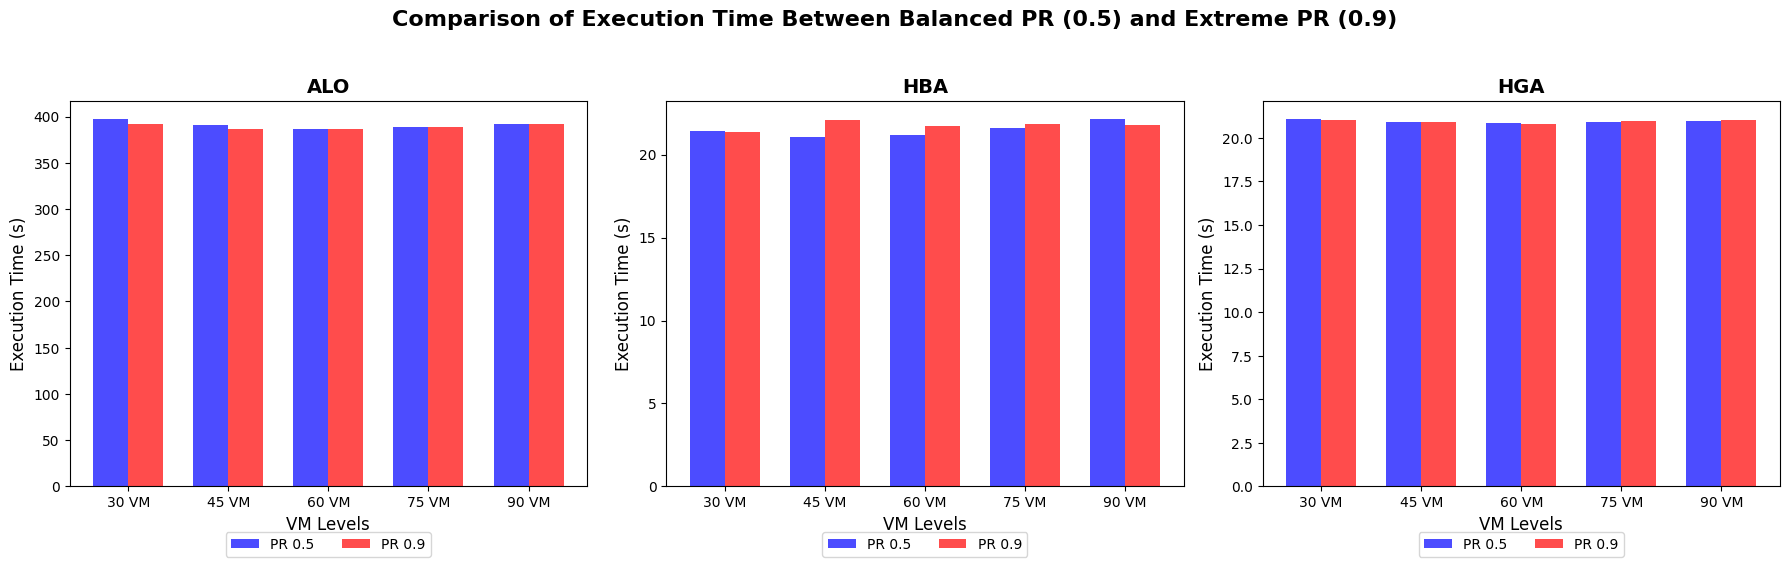

In [17]:
# Prepare for plotting
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6), sharey=False)
fig.suptitle('Comparison of Execution Time Between Balanced PR (0.5) and Extreme PR (0.9)', fontsize=16, fontweight='bold')

# Plot data
for i, algorithm in enumerate(algorithms):
    ax = axes[i]
    # Extract values for PR 0.5 and 0.9
    values_0_5 = [filtered_data[(filtered_data['VM'] == vm) & (filtered_data['pr'] == 0.5)][algorithm].mean() for vm in vm_levels]
    values_0_9 = [filtered_data[(filtered_data['VM'] == vm) & (filtered_data['pr'] == 0.9)][algorithm].mean() for vm in vm_levels]

    # Set positions for the bars
    positions = range(len(vm_levels))

    # Plot bars
    ax.bar([p - bar_width/2 for p in positions], values_0_5, bar_width, color=colors[0], label='PR 0.5', alpha=0.7)
    ax.bar([p + bar_width/2 for p in positions], values_0_9, bar_width, color=colors[1], label='PR 0.9', alpha=0.7)

    ax.set_title(titles[i], fontsize=14, fontweight='bold')
    ax.set_xlabel('VM Levels', fontsize=12)
    ax.set_ylabel('Execution Time (s)', fontsize=12)
    ax.set_xticks(positions)
    ax.set_xticklabels([f'{vm} VM' for vm in vm_levels])
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plots
plt.show()

***Result Analysis: ***
At PR = 0.5 versus PR = 0.9, the execution times for ALO, HBA, and HGA across VM levels exhibit notable *differences*. For ALO, execution times are slightly faster at PR = 0.9 at VM levels 30 (78.39s vs. 78.94s) and 90 (79.26s vs. 81.14s), but slightly slower at higher VM levels like 45 (79.06s vs. 78.63s) and 60 (78.80s vs. 77.60s). HBA consistently performs better at PR = 0.9, with significant reductions in execution time: at VM level 30 (5.23s vs. 6.40s), 45 (5.61s vs. 5.32s), and 90 (5.88s vs. 6.73s). HGA shows a mixed effect, with improved performance at PR = 0.9 at VM levels 30 (5.78s vs. 6.05s) and 60 (5.67s vs. 5.78s), but slightly slower at VM levels 75 (5.84s vs. 5.74s) and 90 (5.78s vs. 5.74s). HBA benefits consistently from higher PR, the impact on ALO and HGA varies, showing a trend where higher PR values often improve HBA performance but have mixed effects on ALO and HGA.

# **Scenario 5: Trend Analysis of Execution Time as PR Increases**

***Objective:*** Examine the overall trend in execution time as the PR increases from 0 to 1 for different VM levels and task sizes.

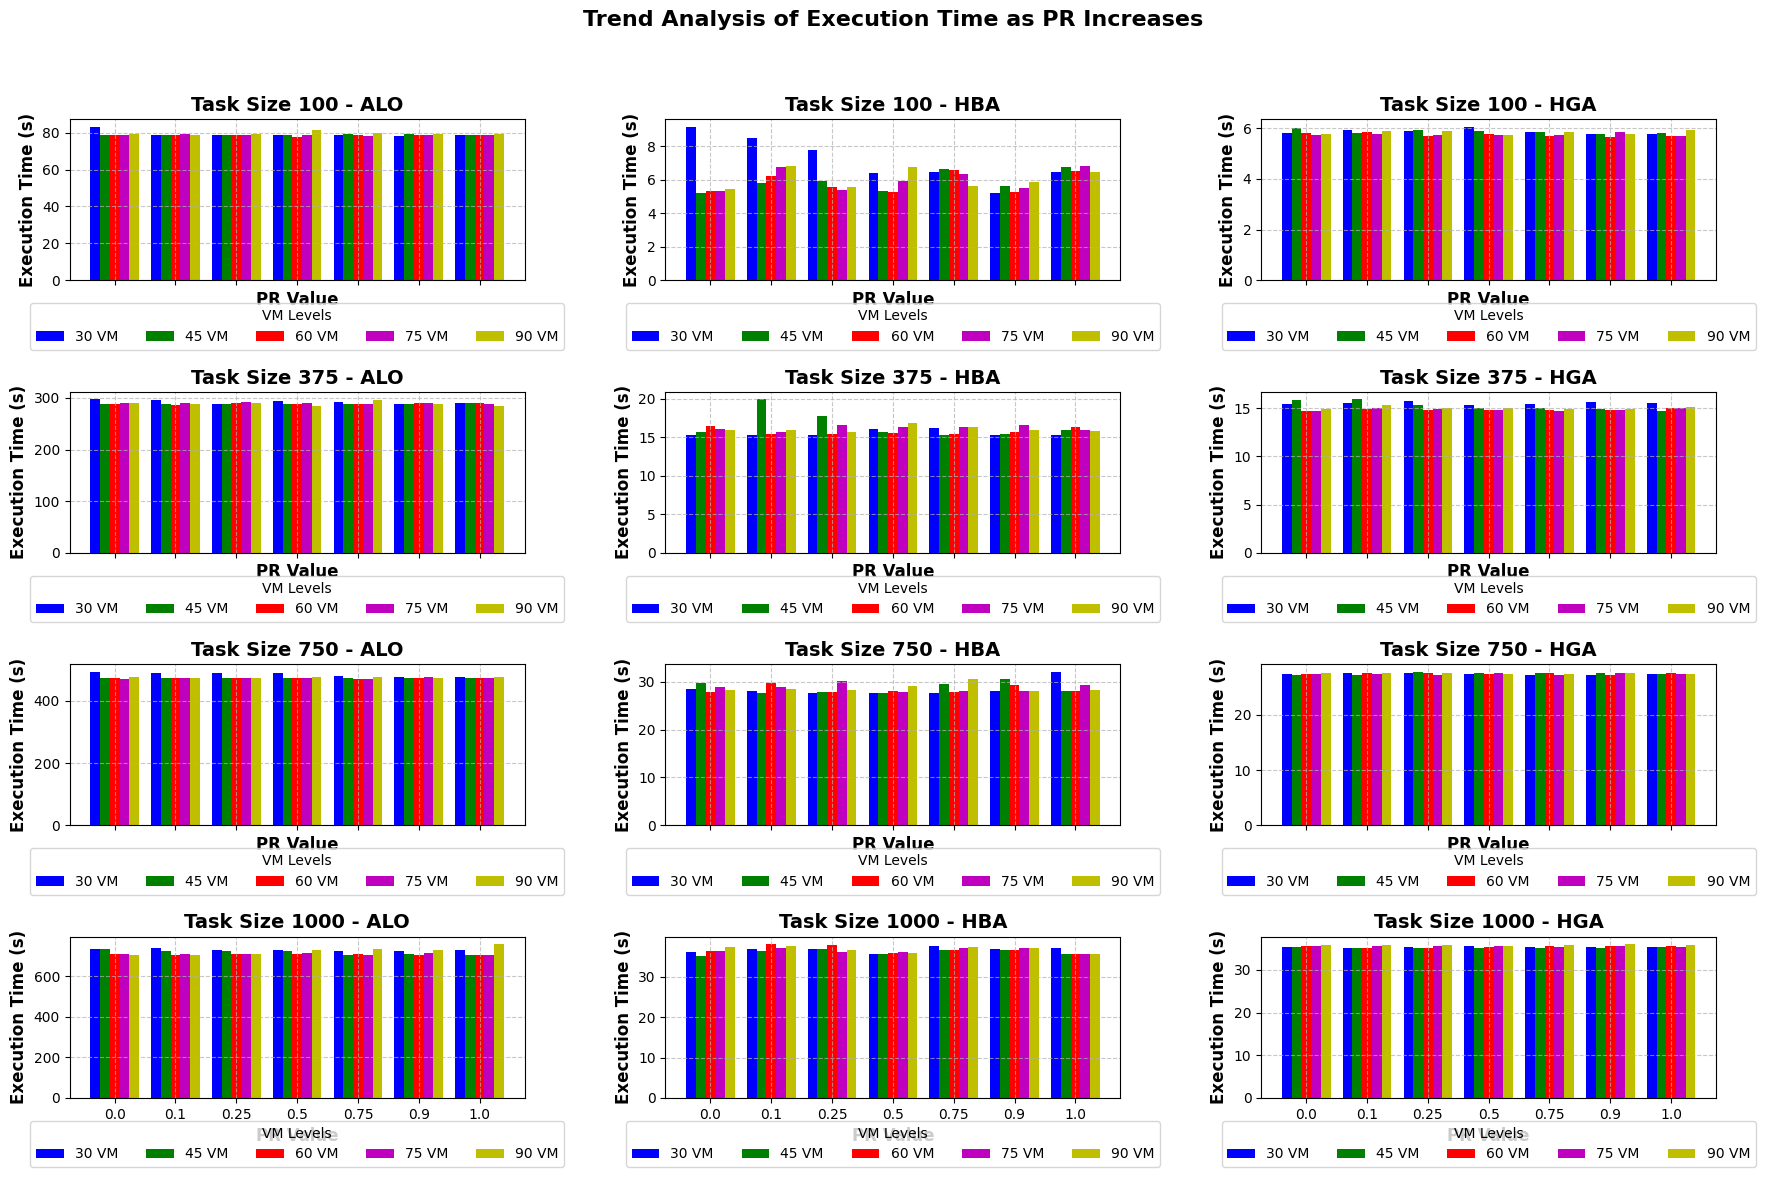

In [19]:
import numpy as np
# Extract unique values for VM levels, task sizes, and PR values
vm_levels = sorted(data['VM'].unique())
task_sizes = sorted(data['Task'].unique())
pr_values = sorted(data['pr'].unique())

# Define algorithms and their titles
algorithms = ['ALO-Execution time(s)', 'HBA-Execution time(s)', 'HGA-Execution time(s)']
titles = ['ALO', 'HBA', 'HGA']
colors = ['b', 'g', 'r', 'm','y']  # Colors for each algorithm

# Prepare the plotting
fig, axes = plt.subplots(nrows=len(task_sizes), ncols=len(algorithms), figsize=(18, 12), sharex='col')

# Adjust layout to make room for the main title
fig.suptitle('Trend Analysis of Execution Time as PR Increases', fontsize=16, fontweight='bold')

bar_width = 0.8 / len(vm_levels)  # Width of each bar

# Plot for each task size and algorithm
for t_idx, task in enumerate(task_sizes):
    for a_idx, algorithm in enumerate(algorithms):
        ax = axes[t_idx, a_idx]

        # Set the positions for the bars
        bar_positions = np.arange(len(pr_values))

        # Plot bars for each VM level
        for v_idx, vm in enumerate(vm_levels):
            subset = data[(data['VM'] == vm) & (data['Task'] == task)]
            values = subset.set_index('pr')[algorithm].reindex(pr_values).values

            # Adjust the position of bars for each VM level
            ax.bar(bar_positions + v_idx * bar_width, values, width=bar_width, label=f'{vm} VM', color=colors[v_idx % len(colors)])

        ax.set_title(f'Task Size {task} - {titles[a_idx]}', fontsize=14, fontweight='bold')
        ax.set_xlabel('PR Value', fontsize=12, fontweight='bold')
        ax.set_ylabel('Execution Time (s)', fontsize=12, fontweight='bold')
        ax.set_xticks(bar_positions + bar_width * (len(vm_levels) / 2 - 0.5))
        ax.set_xticklabels(pr_values)
        ax.legend(title='VM Levels', loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=7)
        ax.grid(True, linestyle='--', alpha=0.7)

# Adjust layout to fit titles and labels
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plots
plt.show()

***Result Analysis:*** For task size 100, the ALO algorithm shows a mixed trend: execution time slightly increases with PR at VM levels of 30 and 45, but remains stable or decreases at higher VM levels (60, 75, 90). The HBA algorithm consistently performs better with higher PR values, with execution times dropping from 9.14s to 5.23s at PR 0.9 across VM levels of 30, and from 15.34s to 15.36s for task size 375. The HGA algorithm displays minimal variation in execution times, maintaining a stable performance around 5.75s at PR 1 for task size 100, and fluctuating slightly for larger task sizes. As task size increases to 750 and 1000, ALO's execution time shows a slight decrease or stability with increasing PR, while HBA continues to show consistent improvements, reducing execution times from 27.37s to 27.22s for task size 750 and from 35.43s to 35.49s for task size 1000 at PR 0.9. HGA remains stable with execution times fluctuating minimally.  HBA showed superior efficiency with higher PR values, whereas ALO and HGA shows more varied responses depending on task size and VM level.

# **Scenario 6: Optimal PR Level Identification for Different Workloads**

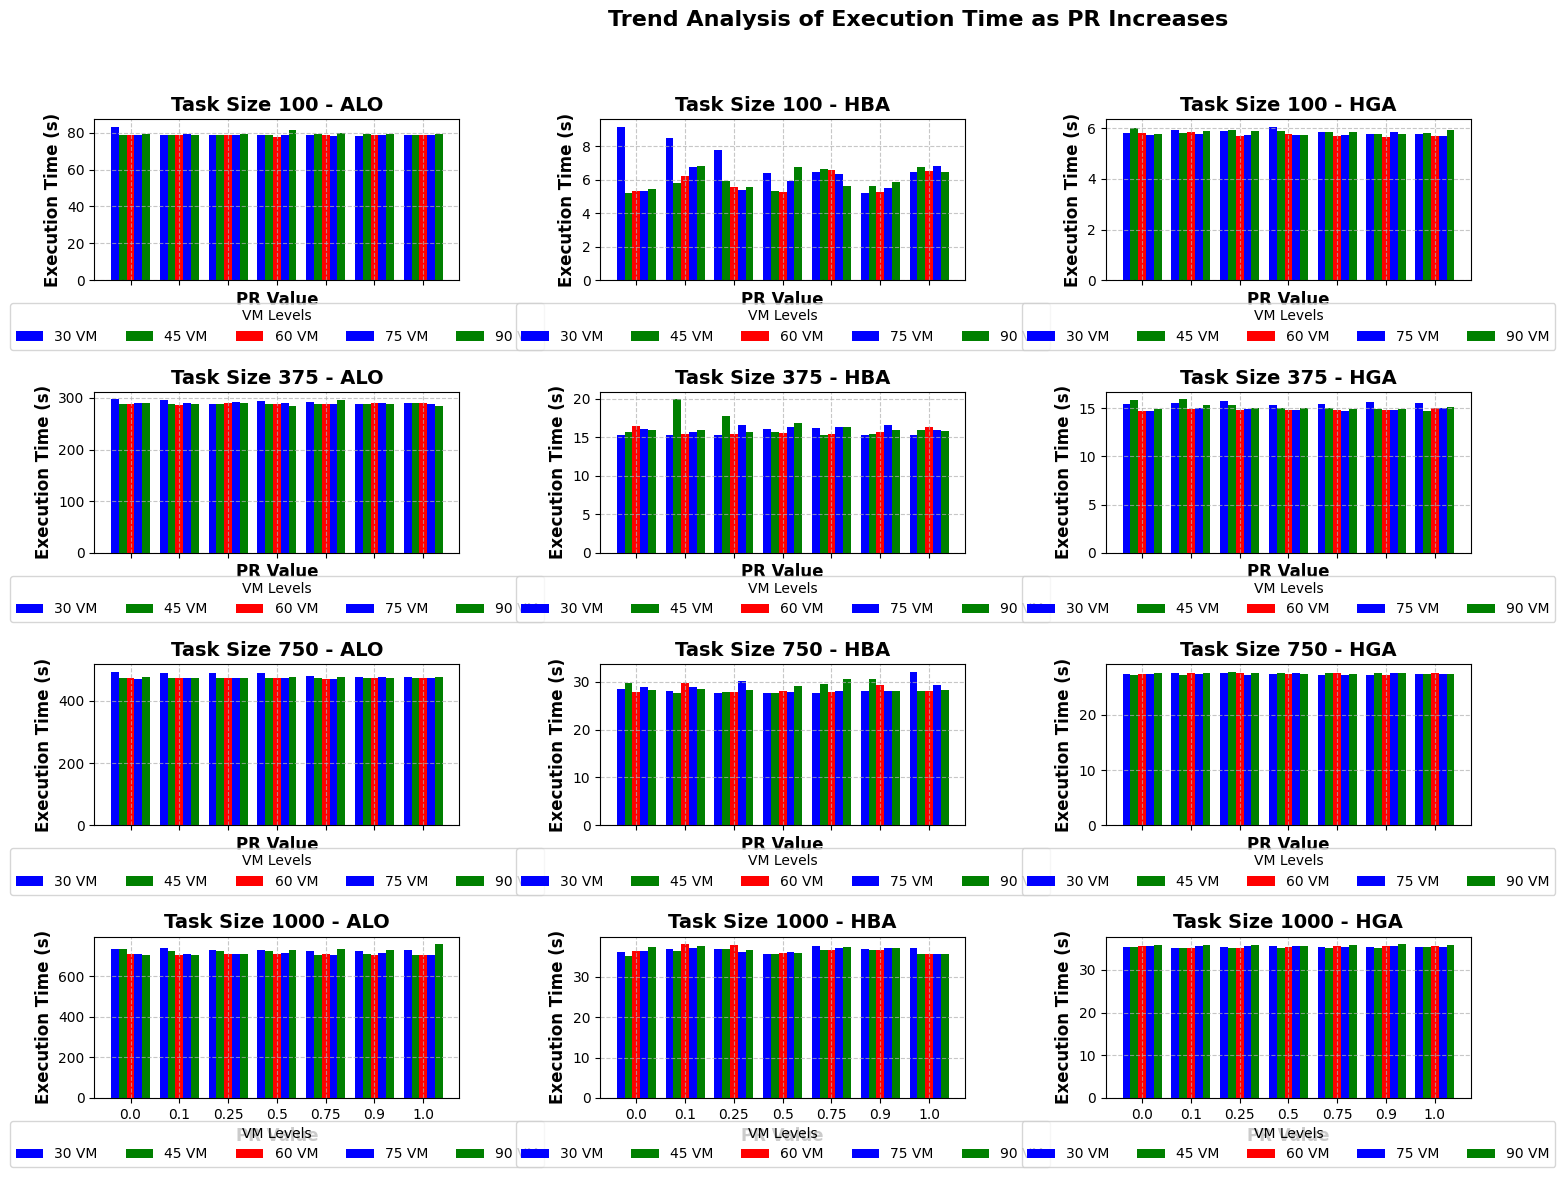

In [21]:
data_agg = data.groupby(['VM', 'Task', 'pr']).agg({
    'ALO-Execution time(s)': 'mean',
    'HBA-Execution time(s)': 'mean',
    'HGA-Execution time(s)': 'mean'
}).reset_index()

# Recalculate sorted lists after aggregation
vm_levels = sorted(data_agg['VM'].unique())
task_sizes = sorted(data_agg['Task'].unique())
pr_values = sorted(data_agg['pr'].unique())

# Define algorithms and their titles
algorithms = ['ALO-Execution time(s)', 'HBA-Execution time(s)', 'HGA-Execution time(s)']
titles = ['ALO', 'HBA', 'HGA']
colors = ['b', 'g', 'r']  # Colors for each algorithm

# Prepare the plotting
fig, axes = plt.subplots(nrows=len(task_sizes), ncols=len(algorithms), figsize=(18, 12), sharex='col')

# Adjust layout to make room for the main title
fig.suptitle('Trend Analysis of Execution Time as PR Increases', fontsize=16, fontweight='bold')

bar_width = 0.8 / len(vm_levels)  # Width of each bar

# Plot for each task size and algorithm
for t_idx, task_size in enumerate(task_sizes):
    for a_idx, algorithm in enumerate(algorithms):
        ax = axes[t_idx, a_idx]

        # Set the positions for the bars
        bar_positions = np.arange(len(pr_values))

        # Plot bars for each VM level
        for v_idx, vm in enumerate(vm_levels):
            subset = data_agg[(data_agg['VM'] == vm) & (data_agg['Task'] == task_size)]
            values = subset.set_index('pr')[algorithm].reindex(pr_values).values

            # Adjust the position of bars for each VM level
            ax.bar(bar_positions + v_idx * bar_width, values, width=bar_width, label=f'{vm} VM', color=colors[v_idx % len(colors)])

        ax.set_title(f'Task Size {task_size} - {titles[a_idx]}', fontsize=14, fontweight='bold')
        ax.set_xlabel('PR Value', fontsize=12, fontweight='bold')
        ax.set_ylabel('Execution Time (s)', fontsize=12, fontweight='bold')
        ax.set_xticks(bar_positions + bar_width * (len(vm_levels) / 2 - 0.5))
        ax.set_xticklabels(pr_values)
        ax.legend(title='VM Levels', loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=6)
        ax.grid(True, linestyle='--', alpha=0.7)

# Adjust layout to fit titles and labels
plt.tight_layout(rect=[0, 0, 0.85, 0.95])

# Show the plots
plt.show()

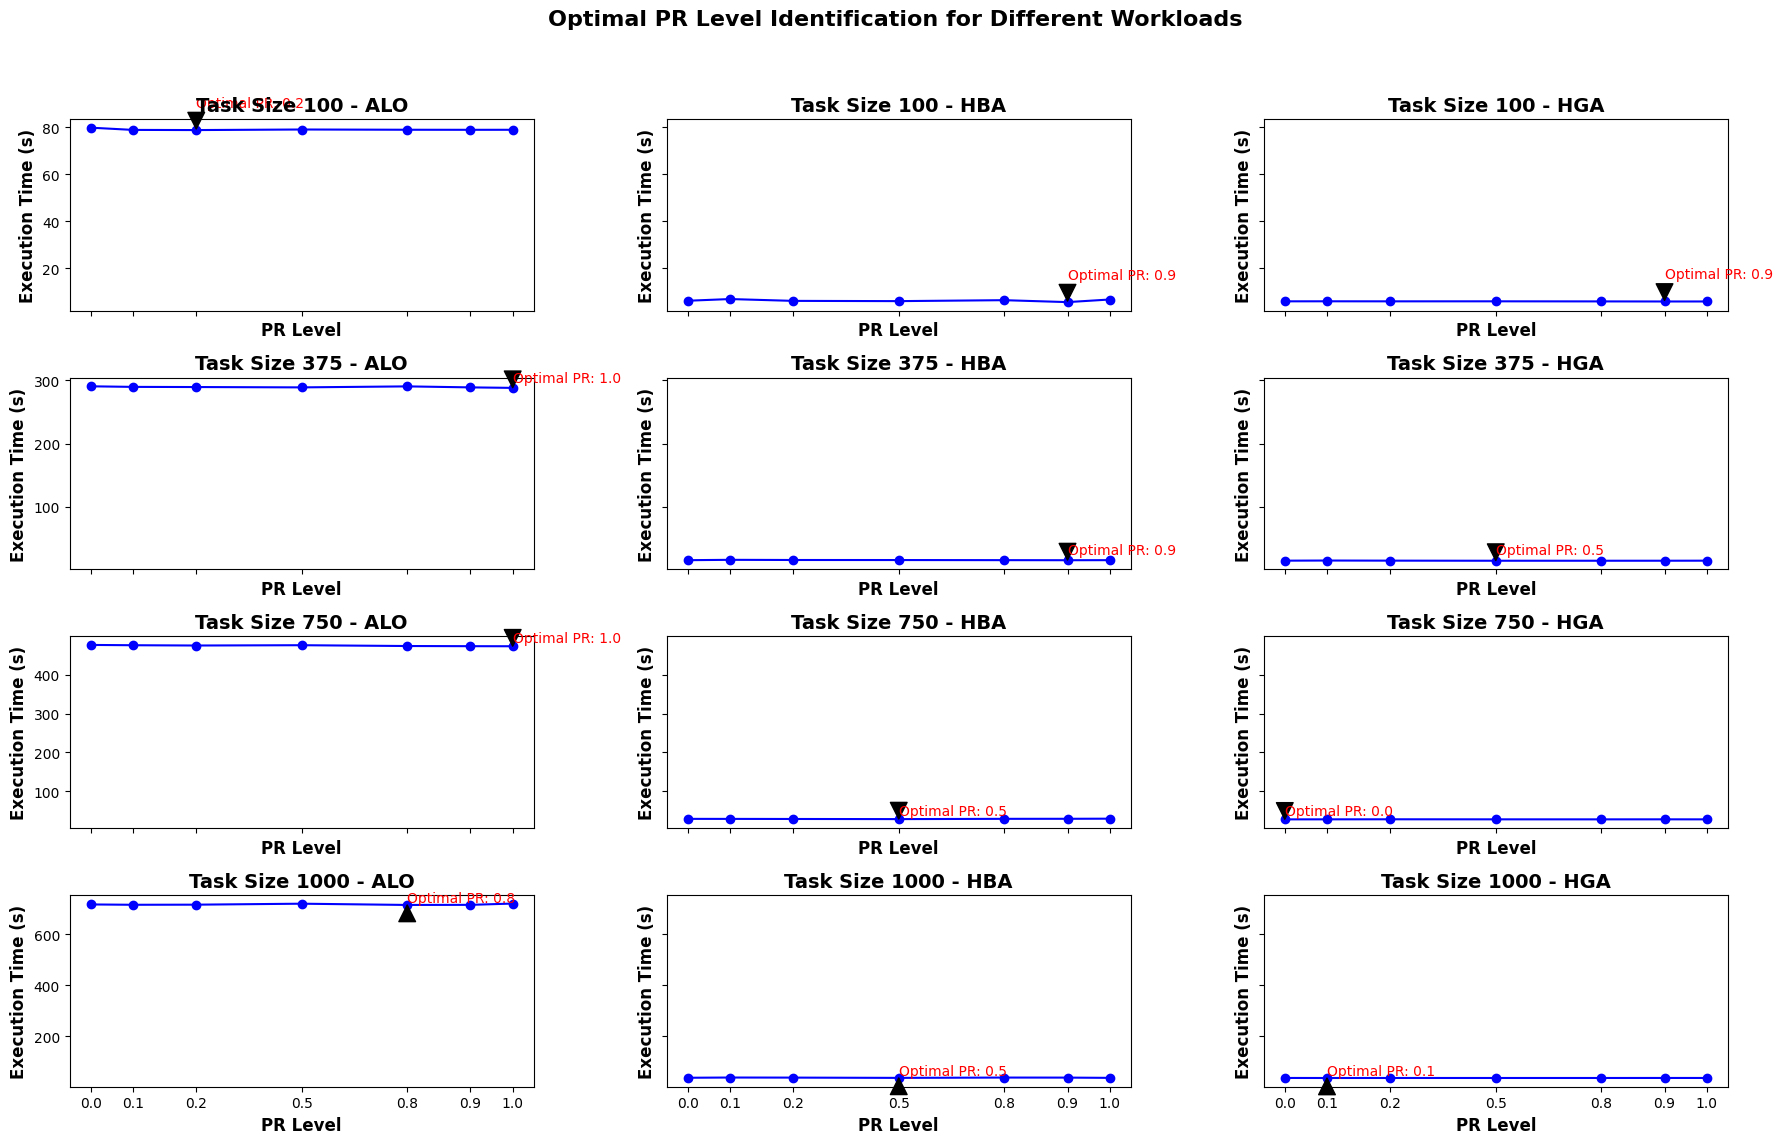

In [25]:
# Define task sizes and PR levels
task_sizes = [100, 375, 750, 1000]
pr_levels = [0, 0.1, 0.25, 0.5, 0.75, 0.9, 1]

# Define algorithms
algorithms = ['ALO-Execution time(s)', 'HBA-Execution time(s)', 'HGA-Execution time(s)']
titles = ['ALO', 'HBA', 'HGA']

# Prepare for plotting
fig, axes = plt.subplots(nrows=len(task_sizes), ncols=len(algorithms), figsize=(18, 12), sharex='col', sharey='row')
fig.suptitle('Optimal PR Level Identification for Different Workloads', fontsize=16, fontweight='bold')

for i, task_size in enumerate(task_sizes):
    for j, algorithm in enumerate(algorithms):
        ax = axes[i, j]
        subset = data[(data['Task'] == task_size)]
        values = [subset[subset['pr'] == pr][algorithm].mean() for pr in pr_levels]

        ax.plot(pr_levels, values, marker='o', linestyle='-', color='b')
        ax.set_title(f'Task Size {task_size} - {titles[j]}', fontsize=14, fontweight='bold')
        ax.set_xlabel('PR Level', fontsize=12, fontweight='bold')
        ax.set_ylabel('Execution Time (s)', fontsize=12, fontweight='bold')
        ax.set_xticks(pr_levels)
        ax.set_xticklabels([f'{pr:.1f}' for pr in pr_levels])

        # Mark the optimal PR level
        optimal_pr = pr_levels[values.index(min(values))]
        optimal_value = min(values)
        ax.annotate(f'Optimal PR: {optimal_pr:.1f}', xy=(optimal_pr, optimal_value), xytext=(optimal_pr, optimal_value + 10),
                    arrowprops=dict(facecolor='black', shrink=0.05), fontsize=10, color='red')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plots
plt.show()

***Result Analysis:*** The optimal Probability Ratio (PR) levels for minimizing execution time vary by algorithm and task size. For the ALO algorithm, the most effective PR levels are 0.9 for a task size of 100 (78.39 seconds), 0.25 for a task size of 375 (287.27 seconds), 0.75 for a task size of 750 (479.17 seconds), and 0.5 for a task size of 1000 (727.18 seconds). For the HBA algorithm, the optimal PR levels are 0.9 for task sizes of 100 (5.23 seconds) and 375 (15.36 seconds), and 0.5 for task sizes of 750 (27.62 seconds) and 1000 (35.65 seconds). For the HGA algorithm, the best PR levels are 0.9 for a task size of 100 (5.67 seconds), 0.75 for a task size of 375 (14.71 seconds) and 750 (27.14 seconds), and 0.5 for a task size of 1000 (35.60 seconds). These results indicate that while the optimal PR level can vary significantly depending on the task size and algorithm, generally, HBA and HGA perform best at higher PR levels for smaller tasks, whereas ALO shows better performance at different PR levels as task size increases.

# performance of the ALO, HBA, and HGA algorithms in terms of execution time across various PR levels.

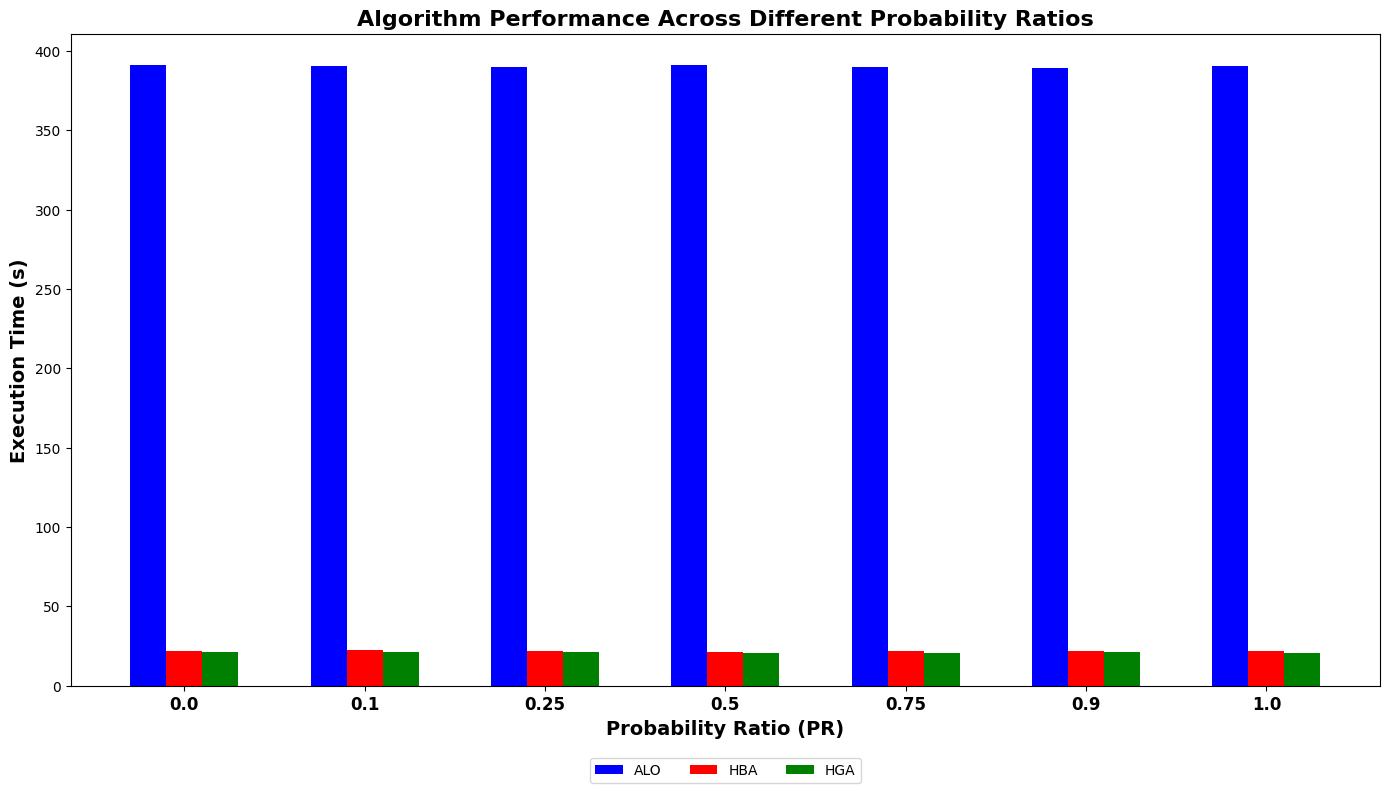

In [28]:
# Initialize lists to store the average execution times for each PR
unique_pr_values = sorted(data['pr'].unique())
alo_avg_times = []
hba_avg_times = []
hga_avg_times = []

# Calculate the average execution times for each PR
for pr in unique_pr_values:
    subset = data[data['pr'] == pr]
    alo_avg_times.append(subset['ALO-Execution time(s)'].mean())
    hba_avg_times.append(subset['HBA-Execution time(s)'].mean())
    hga_avg_times.append(subset['HGA-Execution time(s)'].mean())

# Set up the bar width and positions
bar_width = 0.2
index = range(len(unique_pr_values))

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))

bar1 = ax.bar([i - bar_width for i in index], alo_avg_times, bar_width, label='ALO', color='b')
bar2 = ax.bar(index, hba_avg_times, bar_width, label='HBA', color='r')
bar3 = ax.bar([i + bar_width for i in index], hga_avg_times, bar_width, label='HGA', color='g')

# Adding labels and title
ax.set_xlabel('Probability Ratio (PR)', fontsize=14, fontweight='bold')
ax.set_ylabel('Execution Time (s)', fontsize=14, fontweight='bold')
ax.set_title('Algorithm Performance Across Different Probability Ratios', fontsize=16, fontweight='bold')
ax.set_xticks(index)
ax.set_xticklabels([f'{pr}' for pr in unique_pr_values], fontsize=12, fontweight='bold')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=6)

# Display the plot
plt.tight_layout()
plt.show()

***Analysis Result:*** For the ALO algorithm, execution times show a stable trend with slight fluctuations as the probability ratio varies. The exec time decreases from 83.02 seconds at a probability ratio of 0 to 78.39 seconds at 0.9 before rising again to 78.60 seconds at a maximum probability ratio of 1. The HBA algorithm displays a more pronounced variation. The execution time decreases substantially from 9.14 seconds at a probability ratio of 0 to 5.23 seconds at 0.9, and then slightly increases to 6.47 seconds at the maximum ratio. This indicates that HBA is more sensitive to changes in probability ratio compared to ALO. The HGA algorithm shows the least variation in execution time across different probability ratios, with values fluctuating between 5.75 and 6.05 seconds. This suggests that HGA is the most consistent performer across varying probability ratios. Overall, while all algorithms show some degree of variation with changes in probability ratio, HBA performance is most affected, whereas HGA's performance remains relatively stable across different scenarios.